## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/happygirl/Data Analytics - Immersion/achivement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Boat Sales Analysis', '02 Data', 'Original Data', 'boat_data.csv'))

### Data cleaning

In [5]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [6]:
df.head(20)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


In [7]:
# Display information about data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [8]:
shape=df.shape
print('Rows : ',shape[0])
print('Columns : ',shape[1])

Rows :  9888
Columns :  10


##### Structuring

In [9]:
#Split Price to 'currency','Price'
df[['currency','Price']]= df['Price'].str.split(' ', 1, expand=True)
df.head()

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/2243633011.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['currency','Price']]= df['Price'].str.split(' ', 1, expand=True)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [10]:
df['currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [11]:
def eurprice(Price,currency):
    if currency=='EUR':
        return Price
    elif currency=='CHF':
        return int(Price) * 1.02
    elif currency=='DKK':
        return int(Price) * 0.13
    elif currency=='Â£':
        return int(Price) * 1.17
df['EUR_price'] = df.apply(lambda x: eurprice(x.Price, x.currency), axis=1)

In [12]:
#Split Location to 'Country.abs,'City','Other'
df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)
df[['City','Other']]= df['City'].str.split('Â»', 1, expand=True)
df['City']=df['City'].str.replace('¶','',regex=True)
df['City']=df['City'].str.replace('Ã','',regex=True)

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/1773712652.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)
/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/1773712652.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['City','Other']]= df['City'].str.split('Â»', 1, expand=True)


In [13]:
df_Structuring = df.drop(['Location','currency','Price','Other'],axis=1)
df_Structuring.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.4,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern


##### Cleaning

In [14]:
df_Structuring.isna().sum()

Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
EUR_price                         0
Country                          36
City                            943
dtype: int64

In [15]:
df_Structuring[['Boat Type','Boat Type1']]=df_Structuring['Boat Type'].str.split(',', 1, expand=True)
df_Structuring = df_Structuring.drop(['Boat Type1'],axis=1)

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/2578816233.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_Structuring[['Boat Type','Boat Type1']]=df_Structuring['Boat Type'].str.split(',', 1, expand=True)


In [16]:
# fill Null in "Type"
df_Structuring['Type'].fillna(df_Structuring['Type'].value_counts().idxmax(),inplace=True)

In [17]:
import matplotlib.pyplot as plt

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/3851991545.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Structuring.Length)
/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/3851991545.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Structuring.Wi

Text(0.5, 1.0, 'Width Distribution')

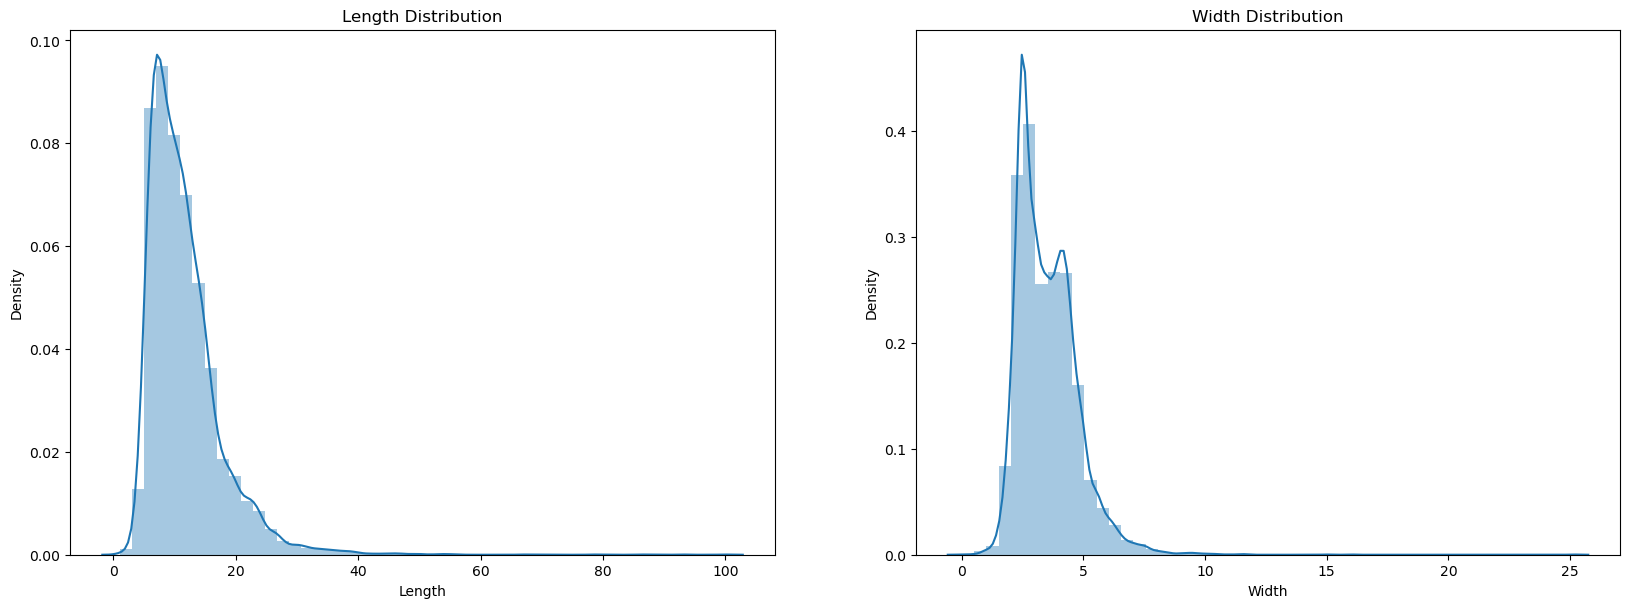

In [18]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.distplot(df_Structuring.Length)
ax1.set_title("Length Distribution")
ax2 = fig.add_subplot(224)
sns.distplot(df_Structuring.Width)
ax2.set_title("Width Distribution")

In [19]:
df_Structuring['Width'].fillna(df_Structuring['Width'].median(),inplace=True)
df_Structuring['Length'].fillna(df_Structuring['Length'].median(),inplace=True)

In [20]:
# fill Null in "Material"
df_Structuring['Material'].fillna(df_Structuring['Material'].value_counts().idxmax(),inplace=True)

##### Duplicates check

In [21]:
df_Structuring.duplicated().sum()

0

In [22]:
df_Cleaning = df_Structuring.dropna(subset=['Manufacturer','Country'])

In [23]:
df_Structuring['Manufacturer'].fillna('None',inplace=True)
df_Structuring['Country'].fillna('None',inplace=True)
df_Structuring['City'].fillna('None',inplace=True)
df_Structuring.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [24]:
df_Cleaning['City'].fillna('None',inplace=True)
df_Cleaning.isna().sum()

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/1191000463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaning['City'].fillna('None',inplace=True)


Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [25]:
print('Befor Clean :' ,df_Structuring.shape)
print('After Clean :' ,df_Cleaning.shape)

Befor Clean : (9888, 11)
After Clean : (8521, 11)


In [26]:
df_Cleaning.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                       object
Country                         object
City                            object
dtype: object

In [27]:
df_Cleaning['EUR_price'] = df['EUR_price'].astype(float)

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/4026246842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cleaning['EUR_price'] = df['EUR_price'].astype(float)


##### Extreme values checks

In [28]:
df_Cleaning.describe()

,Year Built,Length,Width,Number of views last 7 days,EUR_price
count,8521.000000,8521.000000,8521.000000,8521.000000,8.521000e+03
mean,1889.648398,11.169475,3.460122,153.545241,3.006513e+05
std,471.470345,5.345653,1.169778,157.921003,9.701562e+05
min,0.000000,1.700000,0.740000,13.000000,3.300000e+03
25%,1999.000000,7.300000,2.540000,71.000000,4.429000e+04
50%,2008.000000,9.990000,3.270000,110.000000,9.500000e+04
75%,2018.000000,13.680000,4.200000,177.000000,2.500000e+05
max,2021.000000,56.000000,25.160000,3263.000000,3.100000e+07


In [29]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_10406/3184237935.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_Cleaning.corr().round(2)


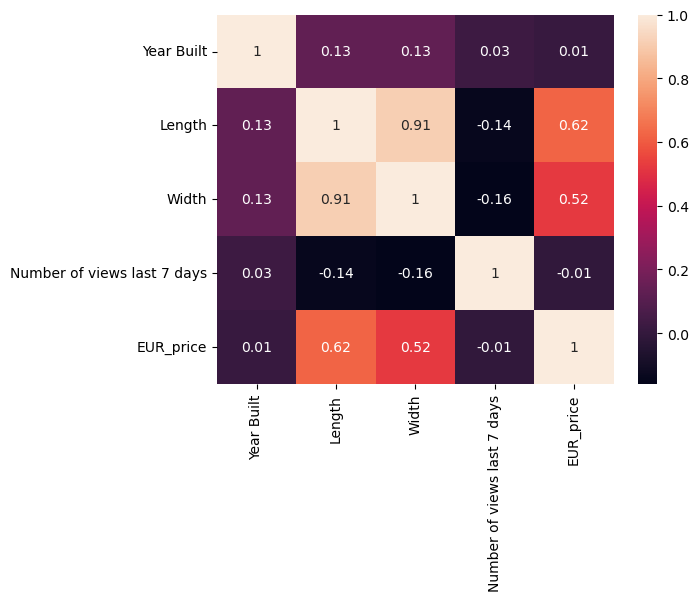

In [30]:
corr = df_Cleaning.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

Heatmap updated, which shows the correlation between the size of the boats and the respective price.

### 2. The elbow technique

In [47]:
df_Cleaning

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.40,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,64,3367.00,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
...,...,...,...,...,...,...,...,...,...,...,...
9882,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,288,5049.00,Switzerland,Bielersee
9883,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,GRP,1116,4998.00,Switzerland,Lago Maggiore
9885,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,354,4499.00,Germany,Nordrhein-Westfalen
9886,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,GRP,266,4300.00,Italy,Dormelletto


In [48]:
df_Cleaning1 = df_Cleaning.drop(columns =['Boat Type','Manufacturer','Type','Material','Country','City'])

In [49]:
df_Cleaning1

,Year Built,Length,Width,Number of views last 7 days,EUR_price
0,2017,4.00,1.90,226,3403.74
1,2020,4.00,1.50,75,3490.00
2,0,3.69,1.42,124,3845.40
3,2020,3.00,1.00,64,3367.00
4,2019,3.55,1.46,58,3399.00
...,...,...,...,...,...
9882,1984,6.00,1.62,288,5049.00
9883,1987,6.30,2.44,1116,4998.00
9885,2020,4.40,1.80,354,4499.00
9886,2018,4.37,1.89,266,4300.00


In [50]:
num_cl = range(1, 20) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [52]:
# Now, create a score for each of the ranges created..
score = [kmeans[i].fit(df_Cleaning1).score(df_Cleaning1) for i in range(len(kmeans))] 

score

/Users/happygirl/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/happygirl/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/happygirl/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/happygirl/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

[-8019051616196641.0,
 -3207287624825299.5,
 -1819251407874982.8,
 -991101683045643.1,
 -661072847601167.8,
 -501115796608719.5,
 -351214108221055.0,
 -262623574676756.56,
 -202162971882532.56,
 -161702398391486.34,
 -125753602069680.3,
 -102969353220585.47,
 -85286437950476.16,
 -69209782951526.336,
 -59059937361638.5,
 -50613826059757.64,
 -42284890389716.266,
 -35357032393507.58,
 -31338749226108.953]

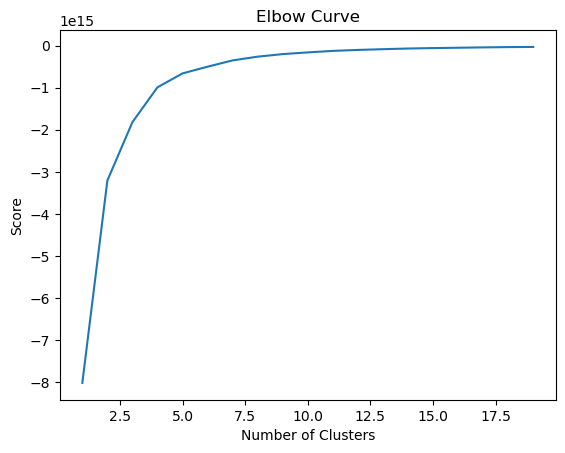

In [53]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  As we can notice, we are getting a value of between 3 and 4 for the breaking point of the curve, meaning that we are going to have to use one of those values. I have decided to go with 4 clusters.

### 3. k-means clustering

In [55]:
# First, create the object based on the n° of clusters
kmeans = KMeans(n_clusters = 4) 


In [57]:
# Fit the k-means object to the data.

kmeans.fit(df_Cleaning1)

/Users/happygirl/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### Attaching to the DF

In [58]:
df_Cleaning1['clusters'] = kmeans.fit_predict(df_Cleaning1)

/Users/happygirl/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
df_Cleaning1.head()

,Year Built,Length,Width,Number of views last 7 days,EUR_price,clusters
0,2017,4.00,1.90,226,3403.74,0
1,2020,4.00,1.50,75,3490.00,0
2,0,3.69,1.42,124,3845.40,0
3,2020,3.00,1.00,64,3367.00,0
4,2019,3.55,1.46,58,3399.00,0


In [60]:
df_Cleaning1['clusters'].value_counts()

0    8114
2     346
1      53
3       8
Name: clusters, dtype: int64

### Ploting

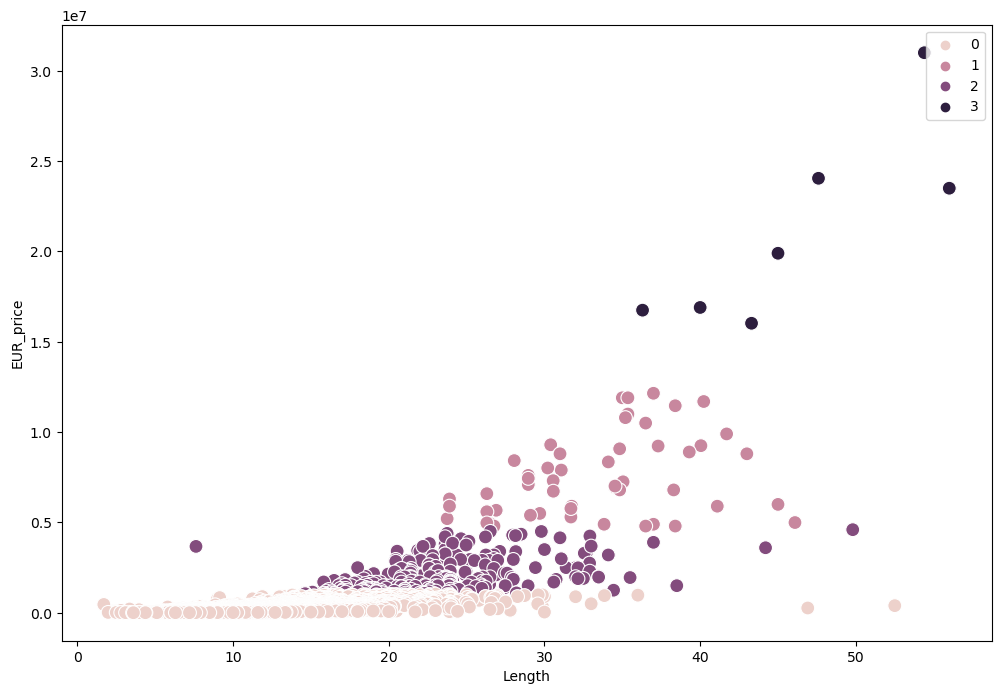

In [64]:
# Plot the clusters for the "Length" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Cleaning1['Length'], y=df_Cleaning1['EUR_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('EUR_price') # Label y-axis.
plt.show()

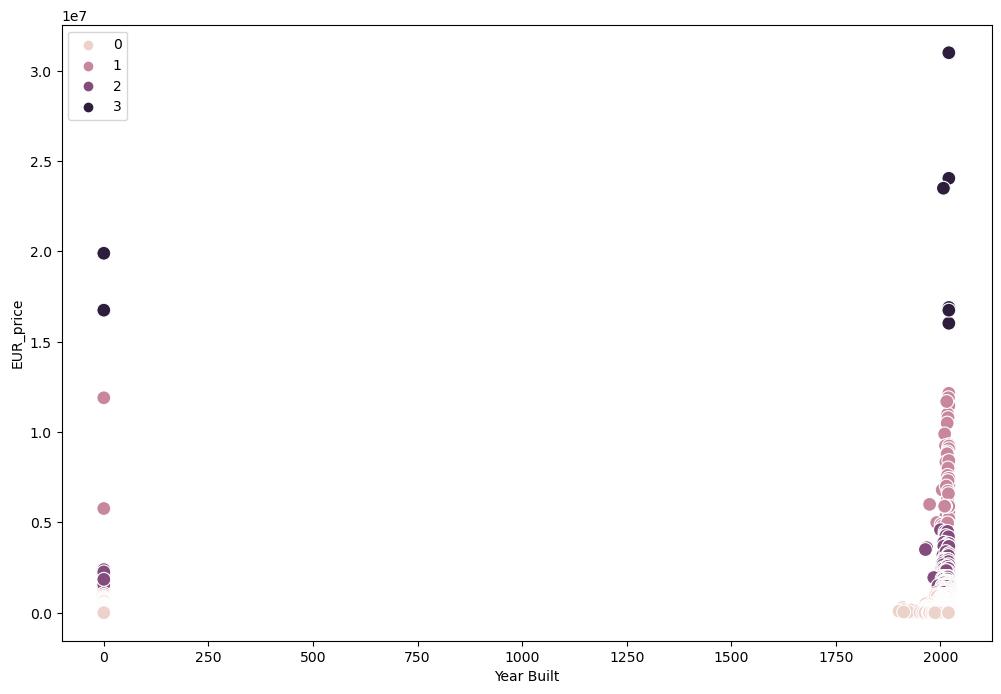

In [65]:
# Plot the clusters for the "Year Built" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Cleaning1['Year Built'], y=df_Cleaning1['EUR_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('EUR_price') 
plt.show()

 ### Plot analysis
 
 The first plot shows a strong correlation between price and length for the second cluster and also for the first and third clusters, however these last two with lower representation.
 
 The second plot shows that that most of the boats were built around 2000, without further useful information.

### Grouping

In [67]:
df_Cleaning1.groupby('clusters').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'EUR_price':['mean', 'median']})

Length            Width            EUR_price            
               mean median      mean median          mean      median
clusters                                                             
0         10.508372   9.76  3.332433   3.15  1.655922e+05     86845.0
1         33.306038  33.83  7.224528   7.16  7.420654e+06   6950000.0
2         22.503035  22.00  5.747514   5.50  1.907702e+06   1650000.0
3         44.862500  44.15  9.100000   9.50  2.060938e+07  18400000.0

The grouping of information shows a positive correlation between the size of the boats and their respective prices.

#### Propose what these results could be useful for in future steps of an analytics pipeline.

#### Heatmap updated
Shows now the correlation between the size of the boats and the respective price, useful to confirm also a possible strategy to promote boats across the internet considering the income profile. 

#### Plot analysis
The first plot shows a strong correlation between price and length for the second cluster and also for the first and third clusters, however these last two with lower representation, therefore a more specific income profile would require a different promotion strategy in matters of communication, for example.

The second plot shows that that most of the boats were built around 2000, without further useful information.

#### Grouping information
Shows a positive correlation between the size of the boats and their respective prices, matching with the updated heatmap - therefore one more foundation for a strategy to promote boats across the internet considering the income profile.
